In [78]:
import numpy as np
import scipy.sparse as sp
import waves
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.ndimage.filters as filters
import matplotlib.animation as animation

In [70]:
L = 1.0
T = 2.0
c = 1.0
nt = 201 # dt = T/(nt-1)
nx = 101 # dx = 2/(nx-1)

# grid
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,nx)
t = np.linspace(0,1,nt)
xx,yy,tt = np.meshgrid(x,y,t)

# velocity
c = 1.0

# source
q = np.zeros((nx,nx,nt))
image = io.imread('2689_1.png')
q[35:65,35:65,0] = 1-image[::20,::20,0]/255
q[35:65,35:65,1] = 1-image[::20,::20,0]/255

# solve
u = waves.solve(q,T/(nt-1), 2*L/(nx-1), c, T, L, n = 2)


In [71]:
# sample
a = np.linspace(0,2*np.pi,101)
xr = 0.9*np.cos(a[0:100])
yr = 0.9*np.sin(a[0:100])
P = waves.sample(x,xr,yr)

d = P@u

p = np.flip(P.T@d,1).copy()

# back propagation
v = waves.solve(p,T/(nt-1), 2*L/(nx-1), c, T, L, n = 2)

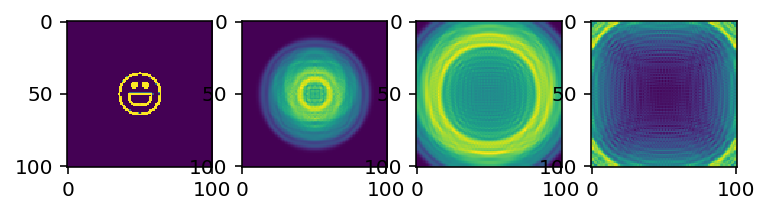

In [93]:
# plot
u.resize((nx,nx,nt))

plt.subplot(141)
plt.imshow(u[:,:,2])

plt.subplot(142)
plt.imshow(u[:,:,51])

plt.subplot(143)
plt.imshow(u[:,:,101])

plt.subplot(144)
plt.imshow(u[:,:,151])


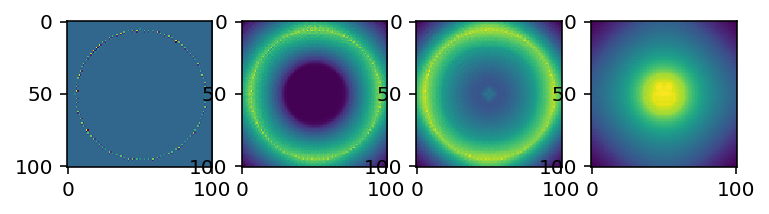

In [73]:
# plot
v.resize((nx,nx,nt))

plt.subplot(141)
plt.imshow(v[:,:,2])

plt.subplot(142)
plt.imshow(v[:,:,51])

plt.subplot(143)
plt.imshow(v[:,:,101])

plt.subplot(144)
plt.imshow(v[:,:,200])


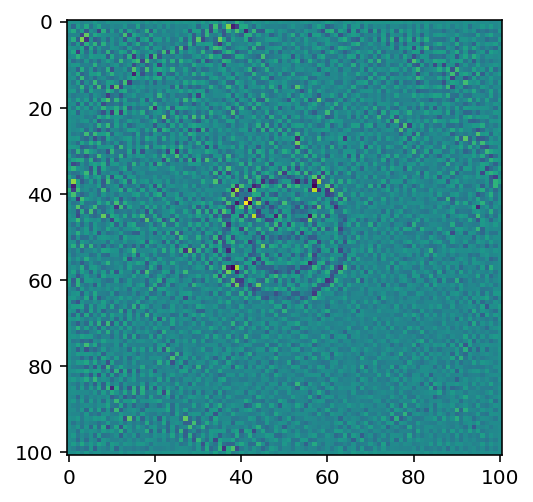

In [77]:
plt.imshow(filters.laplace(v[:,:,200]))